In [1]:


graph = {
    "A": ["B","C"],
    "B": ["A","D"],
    "C": ["A","D"],
    "D": ["B","C","E"],
    "E": ["D"]
}

def friend_suggestions(user):
    direct = set(graph[user])
    suggestions = set()
    for f in direct:
        for fof in graph[f]:
            if fof != user and fof not in direct:
                suggestions.add(fof)
    return list(suggestions)

print("Suggestions for A:", friend_suggestions("A"))


Suggestions for A: ['D']


In [2]:


edges = [
    ("A", "B", 4),
    ("A", "C", 5),
    ("B", "C", -3),
    ("C", "D", 4),
]

dist = {"A":0,"B":float("inf"),"C":float("inf"),"D":float("inf")}

for _ in range(3):
    for u,v,w in edges:
        if dist[u] + w < dist[v]:
            dist[v] = dist[u] + w

print(dist)


{'A': 0, 'B': 4, 'C': 1, 'D': 5}


In [3]:
# ---------------- DIJKSTRA ----------------

import heapq

graph = {
    "A": [("B",1),("C",4)],
    "B": [("C",2),("D",5)],
    "C": [("D",1)],
    "D": []
}

def dijkstra(start):
    dist = {n:float("inf") for n in graph}
    dist[start]=0
    pq=[(0,start)]
    while pq:
        d,u = heapq.heappop(pq)
        for v,w in graph[u]:
            if d+w < dist[v]:
                dist[v] = d+w
                heapq.heappush(pq,(dist[v],v))
    return dist

print(dijkstra("A"))


{'A': 0, 'B': 1, 'C': 3, 'D': 4}


In [4]:


edges = [
    ("A","B",1),
    ("B","C",2),
    ("A","C",3),
]

# Prim
import heapq
adj = {"A":[],"B":[],"C":[]}
for u,v,w in edges:
    adj[u].append((w,v))
    adj[v].append((w,u))

def prim(start):
    visited=set([start])
    pq = []
    for w,v in adj[start]:
        heapq.heappush(pq,(w,start,v))
    total=0
    while pq:
        w,u,v = heapq.heappop(pq)
        if v not in visited:
            visited.add(v)
            total += w
            for w2,x in adj[v]:
                if x not in visited:
                    heapq.heappush(pq,(w2,v,x))
    return total

print("Prim MST Cost:", prim("A"))


Prim MST Cost: 3


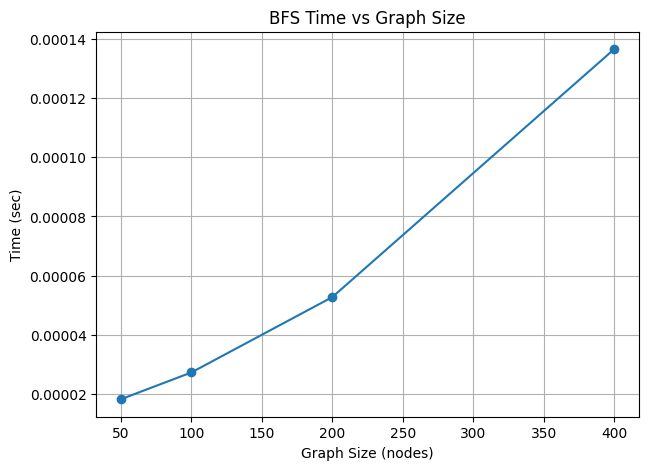

In [7]:
# ==== LAB 3: BFS Time vs Graph Size ====
import random
import time # Import the time module
import matplotlib.pyplot as plt

def time_function(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

def bfs(graph, start):
    visited=set([start])
    q=[start]
    while q:
        u=q.pop(0)
        for v in graph[u]:
            if v not in visited:
                visited.add(v)
                q.append(v)

sizes = [50,100,200,400]
times = []

for n in sizes:
    graph = {i: [] for i in range(n)}
    for i in range(n):
        for _ in range(3):
            v = random.randint(0,n-1)
            graph[i].append(v)
    t = time_function(bfs, graph, 0)
    times.append(t)

plt.figure(figsize=(7,5))
plt.plot(sizes, times, marker='o')
plt.xlabel("Graph Size (nodes)")
plt.ylabel("Time (sec)")
plt.title("BFS Time vs Graph Size")
plt.grid(True)
plt.show()

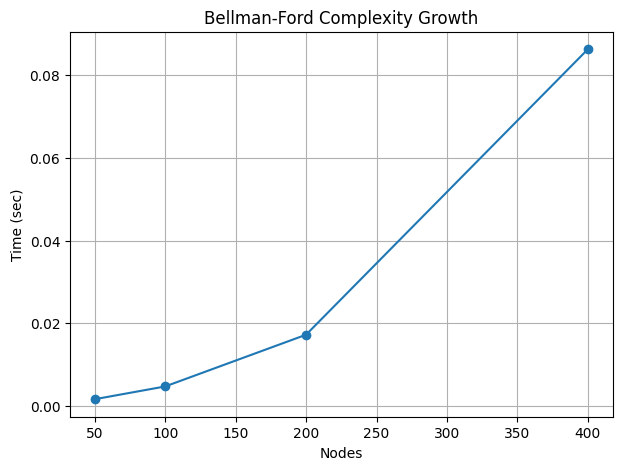

In [8]:
# ==== LAB 3: Bellman-Ford Time vs Edge Count ====

def bellman_ford(n, edges, src=0):
    dist = [float("inf")]*n
    dist[src]=0
    for _ in range(n-1):
        for u,v,w in edges:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u]+w

sizes = [50,100,200,400]
times = []

for n in sizes:
    edges = []
    for _ in range(n*5):
        u = random.randint(0,n-1)
        v = random.randint(0,n-1)
        w = random.randint(-5,10)
        edges.append((u,v,w))
    t = time_function(bellman_ford, n, edges)
    times.append(t)

plt.figure(figsize=(7,5))
plt.plot(sizes, times, marker='o')
plt.xlabel("Nodes")
plt.ylabel("Time (sec)")
plt.title("Bellman-Ford Complexity Growth")
plt.grid(True)
plt.show()


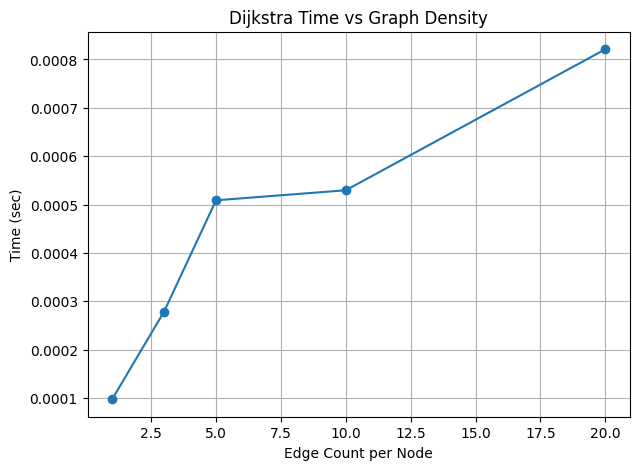

In [9]:
# ==== LAB 3: Dijkstra Time vs Edge Density ====

def dijkstra(graph, start):
    dist = {n:float("inf") for n in graph}
    dist[start]=0
    pq=[(0,start)]
    while pq:
        d,u=heapq.heappop(pq)
        for v,w in graph[u]:
            if d+w < dist[v]:
                dist[v]=d+w
                heapq.heappush(pq,(dist[v],v))

node = 200
densities = [1,3,5,10,20]
times = []

for d in densities:
    graph = {i:[] for i in range(node)}
    for i in range(node):
        for _ in range(d):
            v=random.randint(0,node-1)
            w=random.randint(1,10)
            graph[i].append((v,w))
    t=time_function(dijkstra, graph, 0)
    times.append(t)

plt.figure(figsize=(7,5))
plt.plot(densities, times, marker='o')
plt.xlabel("Edge Count per Node")
plt.ylabel("Time (sec)")
plt.title("Dijkstra Time vs Graph Density")
plt.grid(True)
plt.show()
